In [ ]:
import matplotlib.pyplot as py
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline 

# PROJECT DETAILS

Name : Aman Jha

Roll Number : 2k18/IT/018

Lab : Deep Learning G2

Task : To evaluate performance of Deep neural network on mnist dataset

In [ ]:
# Preparing the dataset
# Setup train and test splits

(x_train, y_train),(x_test,y_test) = mnist.load_data()

x_train_drawing = x_train

image_size = 784 # since its 28 X 28

x_train = x_train.reshape(x_train.shape[0],image_size)

x_test = x_test.reshape(x_test.shape[0],image_size)

num_classes = 10

y_train = keras.utils.to_categorical(y_train,num_classes)

y_test = keras.utils.to_categorical(y_test,num_classes)

11493376/11490434 [==============================] - 0s 0us/step


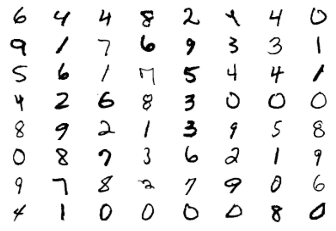

In [ ]:
for i in range(64) :

  ax = plt.subplot(8,8,i+1)
  ax.axis('off')
  plt.imshow(x_train_drawing[randint(0,x_train.shape[0])],cmap = 'Greys')

In [ ]:
model = Sequential()

model.add(Dense(units = 128,activation = 'sigmoid',input_shape=(image_size,)))
model.add(Dense(units = 128,activation = 'sigmoid')) 
model.add(Dense(units = 128,activation = 'sigmoid')) 
model.add(Dense(units = 128,activation = 'sigmoid'))  
model.add(Dense(units=num_classes,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="sgd",loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs = 100,verbose=True,validation_split = .1)

lose,accuracy = model.evaluate(x_test,y_test,verbose = True)

Epoch 1/100
422/422 [==============================] - 3s 6ms/step - loss: 2.3159 - accuracy: 0.1162 - val_loss: 2.2981 - val_accuracy: 0.1050
Epoch 2/100
422/422 [==============================] - 2s 5ms/step - loss: 2.2976 - accuracy: 0.1154 - val_loss: 2.2944 - val_accuracy: 0.1878
Epoch 3/100
422/422 [==============================] - 2s 5ms/step - loss: 2.2933 - accuracy: 0.1333 - val_loss: 2.2902 - val_accuracy: 0.1050
Epoch 4/100
422/422 [==============================] - 2s 5ms/step - loss: 2.2899 - accuracy: 0.1269 - val_loss: 2.2869 - val_accuracy: 0.1243
Epoch 5/100
422/422 [==============================] - 2s 5ms/step - loss: 2.2851 - accuracy: 0.1453 - val_loss: 2.2809 - val_accuracy: 0.1390
Epoch 6/100
422/422 [==============================] - 2s 5ms/step - loss: 2.2802 - accuracy: 0.1474 - val_loss: 2.2751 - val_accuracy: 0.1050
Epoch 7/100
422/422 [==============================] - 2s 5ms/step - loss: 2.2740 - accuracy: 0.1504 - val_loss: 2.2689 - val_accuracy: 0.1050

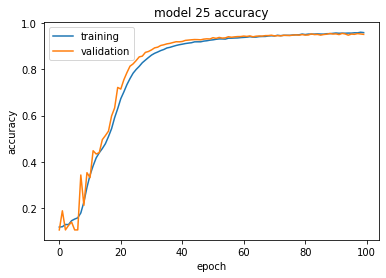

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 25 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

In [ ]:
model_2 = Sequential()

model_2.add(Dense(units = 128,activation = 'relu',input_shape=(image_size,)))
model_2.add(Dense(units = 128,activation = 'relu')) 
model_2.add(Dense(units = 128,activation = 'relu')) 
model_2.add(Dense(units = 128,activation = 'relu'))  
model_2.add(Dense(units=num_classes,activation='softmax'))

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(optimizer="adam",loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model_2.fit(x_train,y_train,batch_size=128,epochs = 100,verbose=True,validation_split = .1)

lose,accuracy = model.evaluate(x_test,y_test,verbose = True)

Epoch 1/100
422/422 [==============================] - 3s 6ms/step - loss: 2.9215 - accuracy: 0.7518 - val_loss: 0.2651 - val_accuracy: 0.9287
Epoch 2/100
422/422 [==============================] - 2s 6ms/step - loss: 0.2239 - accuracy: 0.9360 - val_loss: 0.1653 - val_accuracy: 0.9532
Epoch 3/100
422/422 [==============================] - 2s 6ms/step - loss: 0.1445 - accuracy: 0.9580 - val_loss: 0.1542 - val_accuracy: 0.9535
Epoch 4/100
422/422 [==============================] - 2s 6ms/step - loss: 0.1139 - accuracy: 0.9639 - val_loss: 0.1592 - val_accuracy: 0.9592
Epoch 5/100
422/422 [==============================] - 2s 6ms/step - loss: 0.0999 - accuracy: 0.9691 - val_loss: 0.1603 - val_accuracy: 0.9582
Epoch 6/100
422/422 [==============================] - 2s 6ms/step - loss: 0.0884 - accuracy: 0.9731 - val_loss: 0.1424 - val_accuracy: 0.9640
Epoch 7/100
422/422 [==============================] - 2s 6ms/step - loss: 0.0774 - accuracy: 0.9760 - val_loss: 0.1369 - val_accuracy: 0.9672

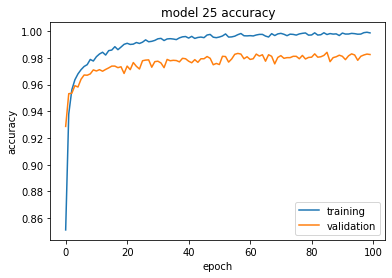

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 25 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()